# Random Forest Classifier on Cancer Dataset

In the world of Machine Learning (ML), where researchers and practitioners are hunting to develop new methods, and giving yet another new algorithm for making predictions, Random Forest Classifier (RFC) remains as important as it was yesterday. Modern biology is adopting the use of ML and Data Science (DS) at an unprecedented rate. Unlike neural networks, RFC is non-parametric, interpretable, efficient, and has a high prediction accuracy for several types of data. As a result, RFC is one of the top choices for classification among bioinformaticians. Further, RFC performs well in cases where the sample size is small yet, high-dimensional and the data-structure is complex. In this context, high-dimensional means a large number of features. The RFC utilizes random sampling and ensemble strategies to achieve accurate predictions and as well as better generalization. The generalization property is something that is a feature of the voting/bagging mechanism that is an integral part of RFC.

RFC is like a decision tree but superior through the use of bagging on samples, a random subset of variables, and majority voting schemes. RFC is suited for high-dimensional data modeling and handles missing values. However, a vanilla RFC might not be suitable for genomics data where the number of features is huge and truly informative features are a few, akin to technical noise introduced as a result of how sequencing works. When the ratio of noisy features to informative features is large, and feature space is huge, base classifiers perform poorly. In such a case, the tweaking of RFC is a necessary evil.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})

## Load the dataset

In [2]:
cancer_df = pd.read_csv("../data/cancer.csv")

## Check the data

In [3]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer_df['id']

0        842302
1        842517
2      84300903
3      84348301
4      84358402
         ...   
564      926424
565      926682
566      926954
567      927241
568       92751
Name: id, Length: 569, dtype: int64

We can see that there are 33 columns and the last one seems to be NaN

## Print the columns

In [5]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Let's drop  the NaN  column and set id as index

In [6]:
list = ['Unnamed: 32']
cancer_df = cancer_df.drop(list,axis = 1 )
cancer_df = cancer_df.set_index('id')
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Diagnosis column tells if cancer is malignant (M) or Benign (B).

## Visualization

Number of Benign:  357
Number of Malignant :  212


/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


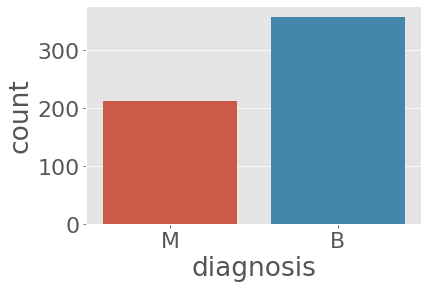

In [7]:
ax = sns.countplot(cancer_df['diagnosis'],label="Count")
B, M = cancer_df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

## We can also get some statistic about each feature

In [8]:
cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [42]:
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


## Visualize using violin plot

In [10]:
cancer_df_std = (cancer_df - cancer_df.mean()) / (cancer_df.std())     

In [11]:
cancer_df_std['diagnosis'] = cancer_df['diagnosis']
cancer_df_std

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.983510,2.485391,1.999478,3.280628,1.315704,2.614365,2.530249,0.660239,2.294058,2.650542,...,1.885031,1.567087,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768,-1.358098
842517,1.907030,0.741749,1.888827,-0.486643,-0.692317,-0.430066,0.547662,0.259933,1.086129,-0.023825,...,1.804340,-0.826235,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473,-0.368879
84300903,1.557513,1.180298,1.455004,1.052000,0.814257,1.081980,2.035440,1.423575,1.953282,1.362280,...,1.510541,0.941382,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398,-0.023953
84348301,-0.763792,-0.288125,-0.549538,3.399917,2.741868,3.889975,1.450431,1.114027,2.173873,1.914213,...,-0.281217,3.280667,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312,0.133866
84358402,1.824624,1.189310,1.219651,0.538866,-0.048477,-0.313119,1.427237,1.143199,0.728618,1.369806,...,1.297434,0.280125,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549,-1.465481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.341795,2.601897,2.013529,0.218868,0.191637,-0.273077,2.318924,2.065360,1.627719,1.945573,...,1.899514,1.040926,1.085429,0.378033,-0.312314,-1.137415,-1.358963,0.720838,0.070963,0.117596
926682,1.722326,1.290429,1.493644,-0.017817,-0.069697,-0.394473,1.262558,0.807720,0.733182,0.692434,...,1.535369,0.102368,-0.423637,-0.690623,-0.217473,-0.188995,-0.531387,2.083301,2.258951,2.045599
926954,0.577445,0.180539,0.427529,-0.038646,0.660696,0.350427,0.105684,0.611619,0.413705,0.046547,...,0.560868,-0.839745,-0.379008,-0.808876,-0.808406,-0.890632,-1.103578,2.043775,-0.257145,1.373645


In [12]:
cancer_df_std_melt = pd.melt(cancer_df_std,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

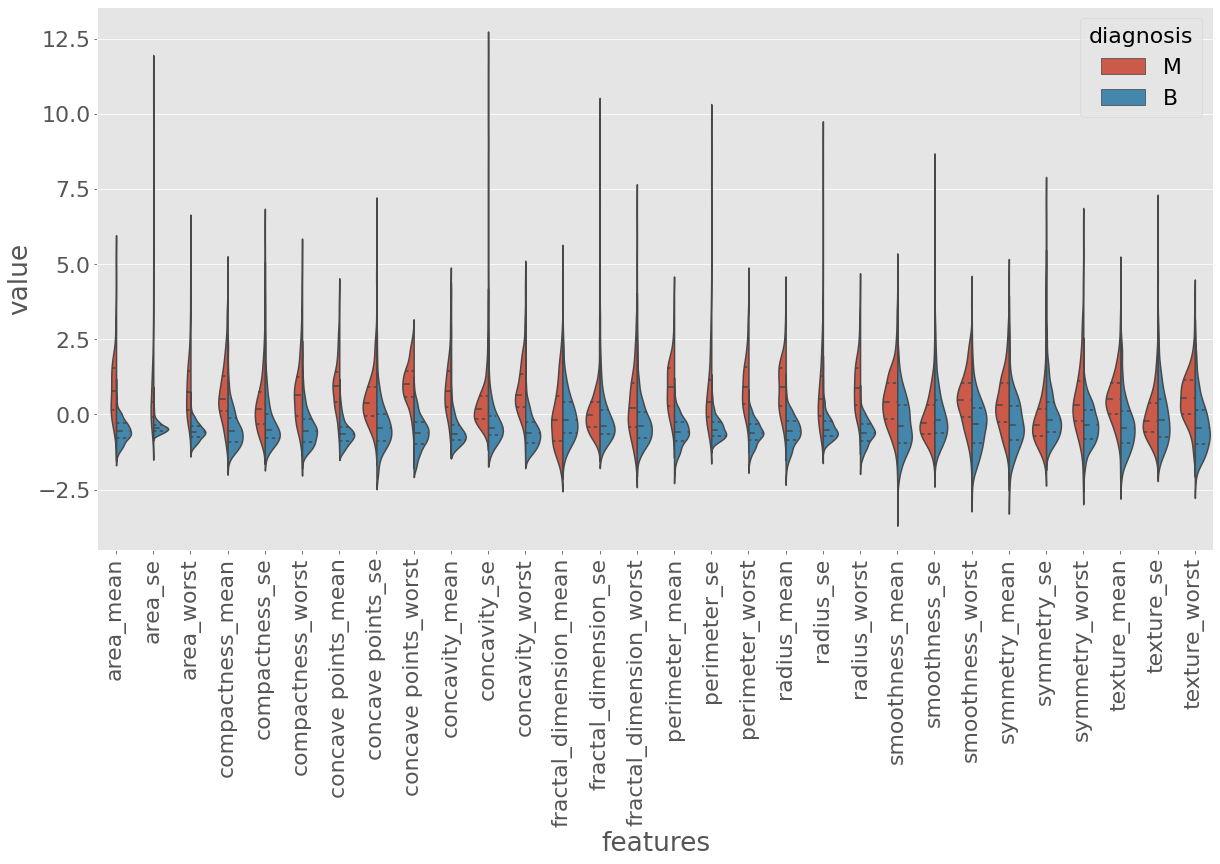

In [13]:
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=cancer_df_std_melt,split=True, inner="quart")
plt.xticks(rotation=90)

## We can also provide heatmap for understanding if there is a correlation between various features

In [14]:
# g = sns.PairGrid(cancer_df_std, diag_sharey=False)
# g.map_lower(sns.kdeplot, cmap="Blues_d")
# g.map_upper(plt.scatter)
# g.map_diag(sns.kdeplot, lw=3)

Text(0.5, 1.0, 'Heatmap of Cancer data features')

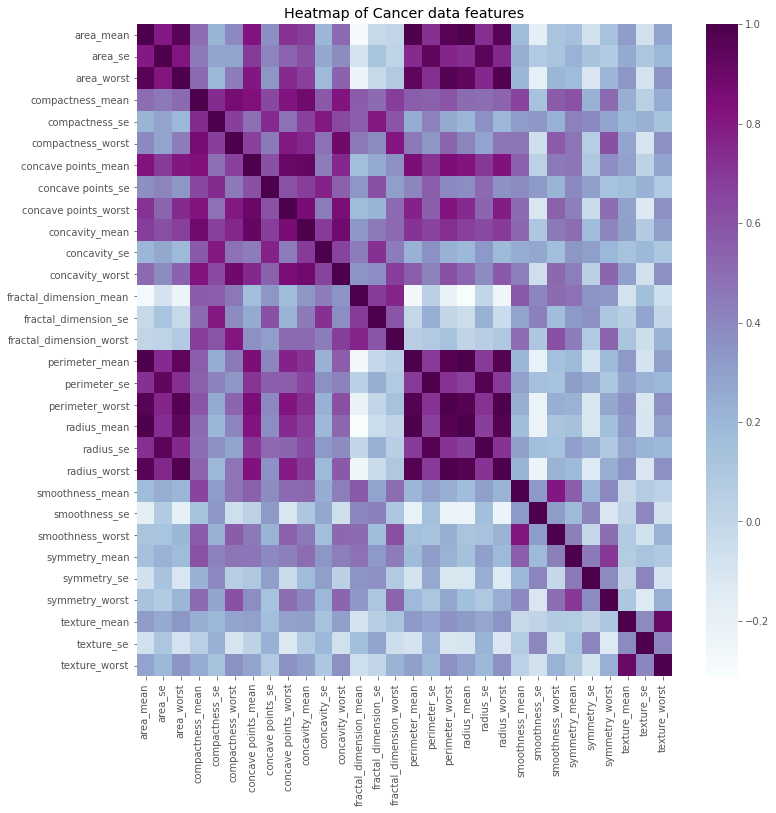

In [24]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(cancer_df_std.corr(), cmap='BuPu')
r.set_title("Heatmap of Cancer data features")


In [25]:
cancer_df_std

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.983510,2.485391,1.999478,3.280628,1.315704,2.614365,2.530249,0.660239,2.294058,2.650542,...,1.885031,1.567087,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768,-1.358098
842517,1.907030,0.741749,1.888827,-0.486643,-0.692317,-0.430066,0.547662,0.259933,1.086129,-0.023825,...,1.804340,-0.826235,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473,-0.368879
84300903,1.557513,1.180298,1.455004,1.052000,0.814257,1.081980,2.035440,1.423575,1.953282,1.362280,...,1.510541,0.941382,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398,-0.023953
84348301,-0.763792,-0.288125,-0.549538,3.399917,2.741868,3.889975,1.450431,1.114027,2.173873,1.914213,...,-0.281217,3.280667,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312,0.133866
84358402,1.824624,1.189310,1.219651,0.538866,-0.048477,-0.313119,1.427237,1.143199,0.728618,1.369806,...,1.297434,0.280125,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549,-1.465481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.341795,2.601897,2.013529,0.218868,0.191637,-0.273077,2.318924,2.065360,1.627719,1.945573,...,1.899514,1.040926,1.085429,0.378033,-0.312314,-1.137415,-1.358963,0.720838,0.070963,0.117596
926682,1.722326,1.290429,1.493644,-0.017817,-0.069697,-0.394473,1.262558,0.807720,0.733182,0.692434,...,1.535369,0.102368,-0.423637,-0.690623,-0.217473,-0.188995,-0.531387,2.083301,2.258951,2.045599
926954,0.577445,0.180539,0.427529,-0.038646,0.660696,0.350427,0.105684,0.611619,0.413705,0.046547,...,0.560868,-0.839745,-0.379008,-0.808876,-0.808406,-0.890632,-1.103578,2.043775,-0.257145,1.373645


Accuracy is:  0.9707602339181286


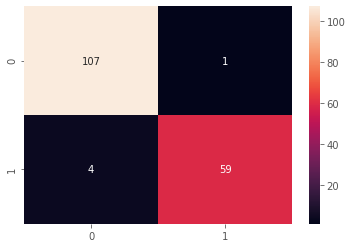

In [67]:
x = cancer_df_std.drop(columns = ['diagnosis'])
y = cancer_df_std['diagnosis']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

We notice that Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Hence, choose concavity_mean.

Further, radius_se, perimeter_se and area_se are correlated, thus use area_se.

radius_worst, perimeter_worst and area_worst are correlated, choose area_worst.

Compactness_worst, concavity_worst and concave points_worst, we can use concavity_worst.

Compactness_se, concavity_se and concave points_se are also correlated. Hence, we use concavity_se.

texture_mean and texture_worst are correlated, we decide to use texture_mean.

 area_worst and area_mean are correlated, we choose area_mean

In [68]:
features_to_drop = ['perimeter_mean','radius_mean','compactness_mean',
                    'concave points_mean','radius_se','perimeter_se',
                    'radius_worst','perimeter_worst','compactness_worst',
                    'concave points_worst','compactness_se','concave points_se',
                    'texture_worst','area_worst']

cancer_df_std_reduced = cancer_df_std.drop(features_to_drop,axis = 1 )
cancer_df_std_reduced

,area_mean,area_se,concavity_mean,concavity_se,concavity_worst,diagnosis,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se
id,,,,,,,,,,,,,,,,,
842302,0.983510,2.485391,2.650542,0.723390,2.107672,M,2.253764,0.906286,1.935312,1.567087,-0.213814,1.306537,2.215566,1.147747,2.748204,-2.071512,-0.564768
842517,1.907030,0.741749,-0.023825,-0.440393,-0.146620,M,-0.867889,-0.099356,0.280943,-0.826235,-0.604819,-0.375282,0.001391,-0.804742,-0.243675,-0.353322,-0.875473
84300903,1.557513,1.180298,1.362280,0.212889,0.854222,M,-0.397658,0.293301,0.201214,0.941382,-0.296744,0.526944,0.938859,0.236827,1.151242,0.455786,-0.779398
84348301,-0.763792,-0.288125,1.914213,0.818798,1.987839,M,4.906602,2.045711,4.930672,3.280667,0.689095,3.391291,2.864862,4.728520,6.040726,0.253509,-0.110312
84358402,1.824624,1.189310,1.369806,0.827742,0.612640,M,-0.561956,0.498889,-0.396751,0.280125,1.481763,0.220362,-0.009552,-0.360775,-0.867590,-1.150804,-0.789549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.341795,2.601897,1.945573,0.665416,0.663928,M,-0.930209,0.167832,-0.708467,1.040926,1.085429,0.378033,-0.312314,-1.137415,-1.358963,0.720838,0.070963
926682,1.722326,1.290429,0.692434,0.251980,0.236365,M,-1.057681,-0.490124,-0.973122,0.102368,-0.423637,-0.690623,-0.217473,-0.188995,-0.531387,2.083301,2.258951
926954,0.577445,0.180539,0.046547,0.510377,0.326479,M,-0.894800,0.036694,-0.318129,-0.839745,-0.379008,-0.808876,-0.808406,-0.890632,-1.103578,2.043775,-0.257145


Accuracy is:  0.9766081871345029


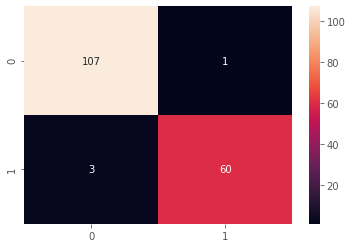

In [69]:
x2 = cancer_df_std_reduced.drop(columns = ['diagnosis'])
y2 = cancer_df_std_reduced['diagnosis']


# split data train 70 % and test 30 %
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train2,y_train2)

ac = accuracy_score(y_test2,clf_rf.predict(x_test2))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test2,clf_rf.predict(x_test2))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

## Recursive feature elimination

In [70]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [71]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])


Chosen best 5 feature by rfe: Index(['area_worst', 'concave points_mean', 'concave points_worst',
       'perimeter_worst', 'radius_worst'],
      dtype='object')


Accuracy is:  0.9649122807017544


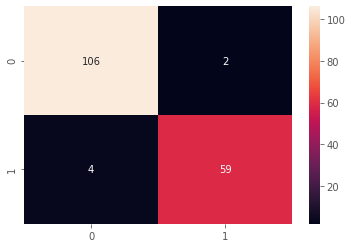

In [72]:
xtrain_5features = x_train[x_train.columns[rfe.support_]]
x_test_5features = x_test[x_train.columns[rfe.support_]]
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(xtrain_5features,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test_5features))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test_5features))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

## Recursive feature elimination with cross validation

In [73]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['area_mean', 'area_se', 'area_worst', 'compactness_worst',
       'concave points_mean', 'concave points_worst', 'concavity_mean',
       'concavity_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean',
       'radius_se', 'radius_worst', 'symmetry_worst', 'texture_mean',
       'texture_worst'],
      dtype='object')


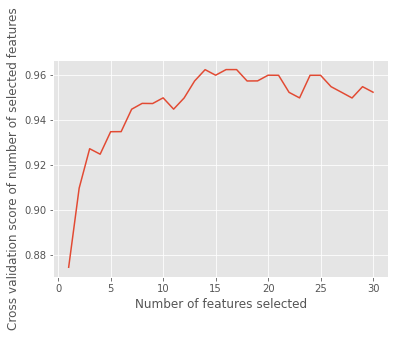

In [74]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


Accuracy is:  0.9649122807017544


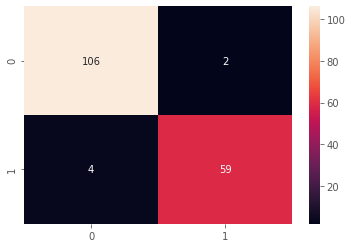

In [75]:
xtrain_optimal_features = x_train[x_train.columns[rfecv.support_]]
x_test_optimal_features = x_test[x_train.columns[rfecv.support_]]
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(xtrain_optimal_features,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test_optimal_features))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test_optimal_features))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

## Finally, we can use the feature importance score in RFC to see how performance is impacted

In [84]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.186000)
2. feature 17 (0.113556)
3. feature 20 (0.111833)
4. feature 8 (0.106430)
5. feature 2 (0.075867)
6. feature 0 (0.047615)
7. feature 1 (0.045361)
8. feature 9 (0.044190)
9. feature 18 (0.037213)
10. feature 11 (0.036520)
11. feature 15 (0.019322)
12. feature 16 (0.018261)
13. feature 27 (0.015821)
14. feature 29 (0.014051)
15. feature 5 (0.013948)
16. feature 26 (0.013096)
17. feature 23 (0.013044)
18. feature 3 (0.012216)
19. feature 19 (0.010556)
20. feature 10 (0.010479)
21. feature 25 (0.007692)
22. feature 21 (0.006362)
23. feature 7 (0.006084)
24. feature 4 (0.005936)
25. feature 13 (0.005746)
26. feature 12 (0.005606)
27. feature 28 (0.004570)
28. feature 24 (0.004438)
29. feature 22 (0.004316)
30. feature 14 (0.003874)


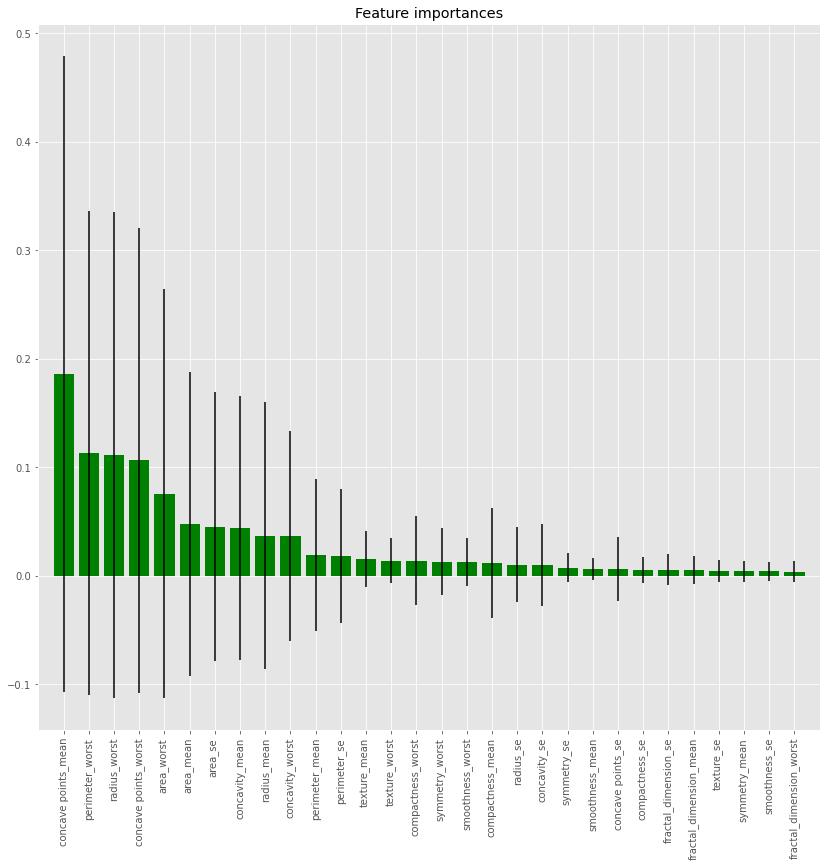

In [85]:

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],  color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()


## PCA for variance

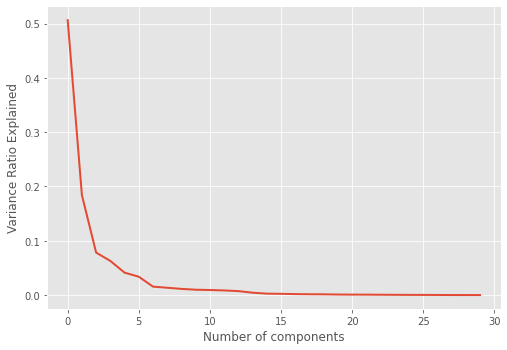

In [90]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(9, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Variance Ratio Explained')
plt.show()